<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/Random_Forest_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest**
A random forest is a machine learning algorithm that uses multiple decision trees to reach a single result. It's a flexible, easy-to-use algorithm that can handle both classification and regression problems

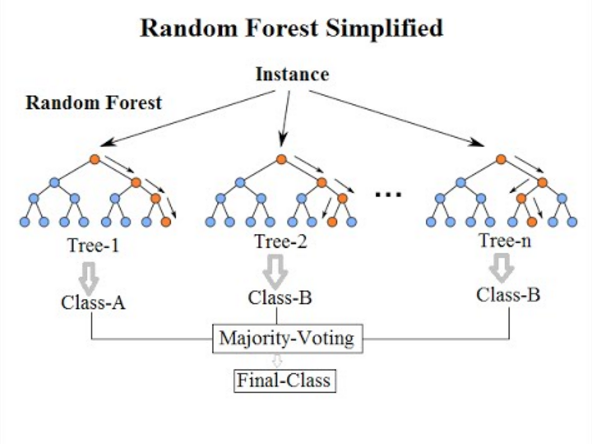

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#

In [2]:
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [4]:
df=pd.read_csv('car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
#Rename columns
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
for col in col_names:
  print(df[col].value_counts())


buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [8]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [9]:
x=df.drop(['class'],axis=1)
y=df['class']
#

In [10]:
#Split into training testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
#

In [11]:
#print training and testing
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
#

(1157, 6) (570, 6)
(1157,) (570,)


In [12]:
x_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


In [16]:
#Category Encoder
#!pip install category_encoders
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
x_train=encoder.fit_transform(x_train)
x_test=encoder.transform(x_test)
x_train.head()


,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [17]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


In [24]:
#Random forest classifier model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
#
#Accuracy
from sklearn.metrics import accuracy_score
print("Model Accuracy 100 decision Tree ",accuracy_score(y_test,y_pred))

Model Accuracy 100 decision Tree  0.9649122807017544


In [25]:
#create classifier with e_estimator=100
rf_100=RandomForestClassifier(n_estimators=100,random_state=0)
rf_100.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [26]:
#view the features score
score=pd.Series(rf_100.feature_importances_,index=x.columns)
score.sort_values(ascending=False)

,0
safety,0.291657
persons,0.235380
buying,0.160692
maint,0.134143
lug_boot,0.111595
doors,0.066533


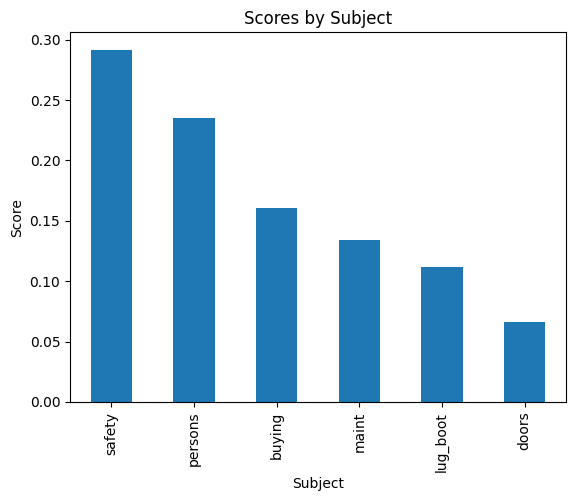

In [27]:
#Creating a seaborn bar plot
score.sort_values(ascending=False).plot(kind='bar')
plt.title('Scores by Subject')
plt.xlabel('Subject')
plt.ylabel('Score')
plt.show()

In [30]:
#Build the random forest model on selected columns/features
X=df.drop(['doors'],axis=1)


In [31]:
#print confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix",cm)

#print accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
print("Accuracy Score",ac)

Confusion Matrix [[119   2   5   1]
 [  1  13   2   2]
 [  2   0 397   0]
 [  5   0   0  21]]
Accuracy Score 0.9649122807017544


In [32]:
#classfication report
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print("Classification Report",cr)
#

Classification Report               precision    recall  f1-score   support

         acc       0.94      0.94      0.94       127
        good       0.87      0.72      0.79        18
       unacc       0.98      0.99      0.99       399
       vgood       0.88      0.81      0.84        26

    accuracy                           0.96       570
   macro avg       0.92      0.87      0.89       570
weighted avg       0.96      0.96      0.96       570

